In [137]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
import pickle
import xgboost
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [138]:
house=pd.read_csv('/home/rumana/Desktop/DM-Project/Data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [139]:
house.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,102001,0,United States,Country,NaN,127202.0,127546.0,127908.0,128645.0,129389.0,...,271623.0,274979.0,278635.0,282495.0,287202.0,292730.0,298613.0,304008.0,308632.0,312728.0
1,394913,1,"New York, NY",Msa,NY,224341.0,225681.0,226887.0,229261.0,231472.0,...,516687.0,521426.0,525792.0,530533.0,536044.0,543211.0,551142.0,558738.0,564641.0,569191.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,231193.0,231998.0,233231.0,235576.0,238089.0,...,741209.0,748698.0,756569.0,767615.0,783282.0,803090.0,823992.0,837437.0,846549.0,851308.0
3,394463,3,"Chicago, IL",Msa,IL,170104.0,170505.0,171024.0,172064.0,173166.0,...,258211.0,260534.0,262648.0,265690.0,268442.0,272263.0,276430.0,280547.0,283620.0,286280.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130035.0,130139.0,130225.0,130437.0,130658.0,...,276637.0,280005.0,284015.0,289524.0,295921.0,303225.0,311010.0,318887.0,326057.0,332118.0


In [140]:
house.tail()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
903,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,81702.0,82847.0,84199.0,84499.0,84998.0,85445.0,86421.0,87549.0,88609.0,89544.0
904,753874,930,"Craig, CO",Msa,CO,94741.0,95085.0,95668.0,96360.0,97075.0,...,NaN,214132.0,219224.0,223021.0,226345.0,229787.0,232861.0,236543.0,239833.0,242809.0
905,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,136993.0,139388.0,141606.0,143469.0,145612.0,147618.0,150033.0,155032.0,159714.0,164353.0
906,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,70218.0,71261.0,71623.0,72008.0,72666.0,73363.0,73961.0,74432.0,74762.0
907,394743,933,"Ketchikan, AK",Msa,AK,NaN,NaN,NaN,NaN,NaN,...,321416.0,322965.0,325062.0,327187.0,329357.0,330905.0,332472.0,334200.0,336433.0,338383.0


In [141]:
print(house.isnull().any())


RegionID      False
SizeRank      False
RegionName    False
RegionType    False
StateName      True
              ...  
2021-06-30    False
2021-07-31     True
2021-08-31     True
2021-09-30     True
2021-10-31     True
Length: 267, dtype: bool


In [142]:
print(house.isnull().sum())

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     1
             ..
2021-06-30    0
2021-07-31    1
2021-08-31    2
2021-09-30    3
2021-10-31    2
Length: 267, dtype: int64


In [143]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Columns: 267 entries, RegionID to 2021-10-31
dtypes: float64(262), int64(2), object(3)
memory usage: 1.8+ MB


In [144]:
house.describe()

,RegionID,SizeRank,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
count,908.000000,908.000000,443.000000,444.000000,445.000000,447.000000,449.000000,450.000000,451.000000,452.000000,...,8.100000e+02,9.060000e+02,9.080000e+02,9.080000e+02,9.060000e+02,9.080000e+02,9.070000e+02,9.060000e+02,9.050000e+02,9.060000e+02
mean,415016.392070,458.099119,110924.313770,111241.481982,111476.076404,112298.190157,113126.351893,113654.046667,114354.485588,115032.491150,...,2.103962e+05,2.093723e+05,2.125299e+05,2.153991e+05,2.182025e+05,2.224780e+05,2.264958e+05,2.304086e+05,2.338609e+05,2.366971e+05
std,84133.878975,267.957457,53033.547608,53211.232958,53466.520487,54335.651287,55099.750613,55871.614119,56621.495386,57458.143671,...,1.368546e+05,1.346825e+05,1.365958e+05,1.391067e+05,1.417899e+05,1.467566e+05,1.511940e+05,1.550531e+05,1.580755e+05,1.605620e+05
min,102001.000000,0.000000,30421.000000,30591.000000,30690.000000,30824.000000,31022.000000,31124.000000,31303.000000,31292.000000,...,3.027200e+04,3.007100e+04,3.037600e+04,3.044100e+04,3.079100e+04,3.101000e+04,3.130500e+04,3.149300e+04,3.169500e+04,3.177500e+04
25%,394547.750000,226.750000,76102.000000,76418.250000,76610.000000,77023.000000,77392.000000,77671.250000,78088.000000,78479.500000,...,1.269750e+05,1.286752e+05,1.305038e+05,1.318065e+05,1.328140e+05,1.345682e+05,1.358205e+05,1.372392e+05,1.384310e+05,1.396390e+05
50%,394803.500000,454.500000,100127.000000,100334.500000,100465.000000,100933.000000,101551.000000,101784.000000,102029.000000,102655.000000,...,1.702780e+05,1.695885e+05,1.723825e+05,1.742140e+05,1.761370e+05,1.781505e+05,1.800960e+05,1.826095e+05,1.845370e+05,1.861075e+05
75%,395049.250000,686.250000,129407.500000,129506.500000,129451.000000,130138.000000,130658.000000,130976.500000,131863.000000,132478.250000,...,2.554072e+05,2.521680e+05,2.567645e+05,2.591792e+05,2.626132e+05,2.671985e+05,2.714650e+05,2.745475e+05,2.781400e+05,2.816475e+05
max,753929.000000,933.000000,431075.000000,433661.000000,437361.000000,447917.000000,458029.000000,470024.000000,479288.000000,491573.000000,...,1.312616e+06,1.314617e+06,1.317974e+06,1.333822e+06,1.372326e+06,1.419696e+06,1.457032e+06,1.478005e+06,1.484200e+06,1.493020e+06


In [145]:
Price_H=house[house['RegionName'].astype(str)=='Denver, CO']
Price_H

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
21,394530,21,"Denver, CO",Msa,CO,197831.0,199172.0,200335.0,202923.0,205352.0,...,489253.0,496081.0,503737.0,512413.0,524078.0,537440.0,551253.0,561273.0,568511.0,574734.0


In [146]:
house.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       ...
       '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
       '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31'],
      dtype='object', length=267)

In [147]:
House_data=house.iloc[:, 5:].copy()

In [148]:
House_Data_without_Price=house.iloc[:,0:5].copy()
House_Data_without_Price

,RegionID,SizeRank,RegionName,RegionType,StateName
0,102001,0,United States,Country,NaN
1,394913,1,"New York, NY",Msa,NY
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA
3,394463,3,"Chicago, IL",Msa,IL
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX
...,...,...,...,...,...
903,394767,929,"Lamesa, TX",Msa,TX
904,753874,930,"Craig, CO",Msa,CO
905,394968,931,"Pecos, TX",Msa,TX
906,395188,932,"Vernon, TX",Msa,TX


In [149]:
House_data

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,127202.0,127546.0,127908.0,128645.0,129389.0,130130.0,130886.0,131692.0,132515.0,133343.0,...,271623.0,274979.0,278635.0,282495.0,287202.0,292730.0,298613.0,304008.0,308632.0,312728.0
1,224341.0,225681.0,226887.0,229261.0,231472.0,233825.0,236298.0,238858.0,241425.0,243966.0,...,516687.0,521426.0,525792.0,530533.0,536044.0,543211.0,551142.0,558738.0,564641.0,569191.0
2,231193.0,231998.0,233231.0,235576.0,238089.0,240463.0,242893.0,245444.0,247874.0,250096.0,...,741209.0,748698.0,756569.0,767615.0,783282.0,803090.0,823992.0,837437.0,846549.0,851308.0
3,170104.0,170505.0,171024.0,172064.0,173166.0,174257.0,175465.0,176820.0,178221.0,179599.0,...,258211.0,260534.0,262648.0,265690.0,268442.0,272263.0,276430.0,280547.0,283620.0,286280.0
4,130035.0,130139.0,130225.0,130437.0,130658.0,130843.0,131042.0,131408.0,131862.0,132391.0,...,276637.0,280005.0,284015.0,289524.0,295921.0,303225.0,311010.0,318887.0,326057.0,332118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81702.0,82847.0,84199.0,84499.0,84998.0,85445.0,86421.0,87549.0,88609.0,89544.0
904,94741.0,95085.0,95668.0,96360.0,97075.0,97615.0,98709.0,99382.0,99515.0,99098.0,...,NaN,214132.0,219224.0,223021.0,226345.0,229787.0,232861.0,236543.0,239833.0,242809.0
905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,136993.0,139388.0,141606.0,143469.0,145612.0,147618.0,150033.0,155032.0,159714.0,164353.0
906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,70218.0,71261.0,71623.0,72008.0,72666.0,73363.0,73961.0,74432.0,74762.0


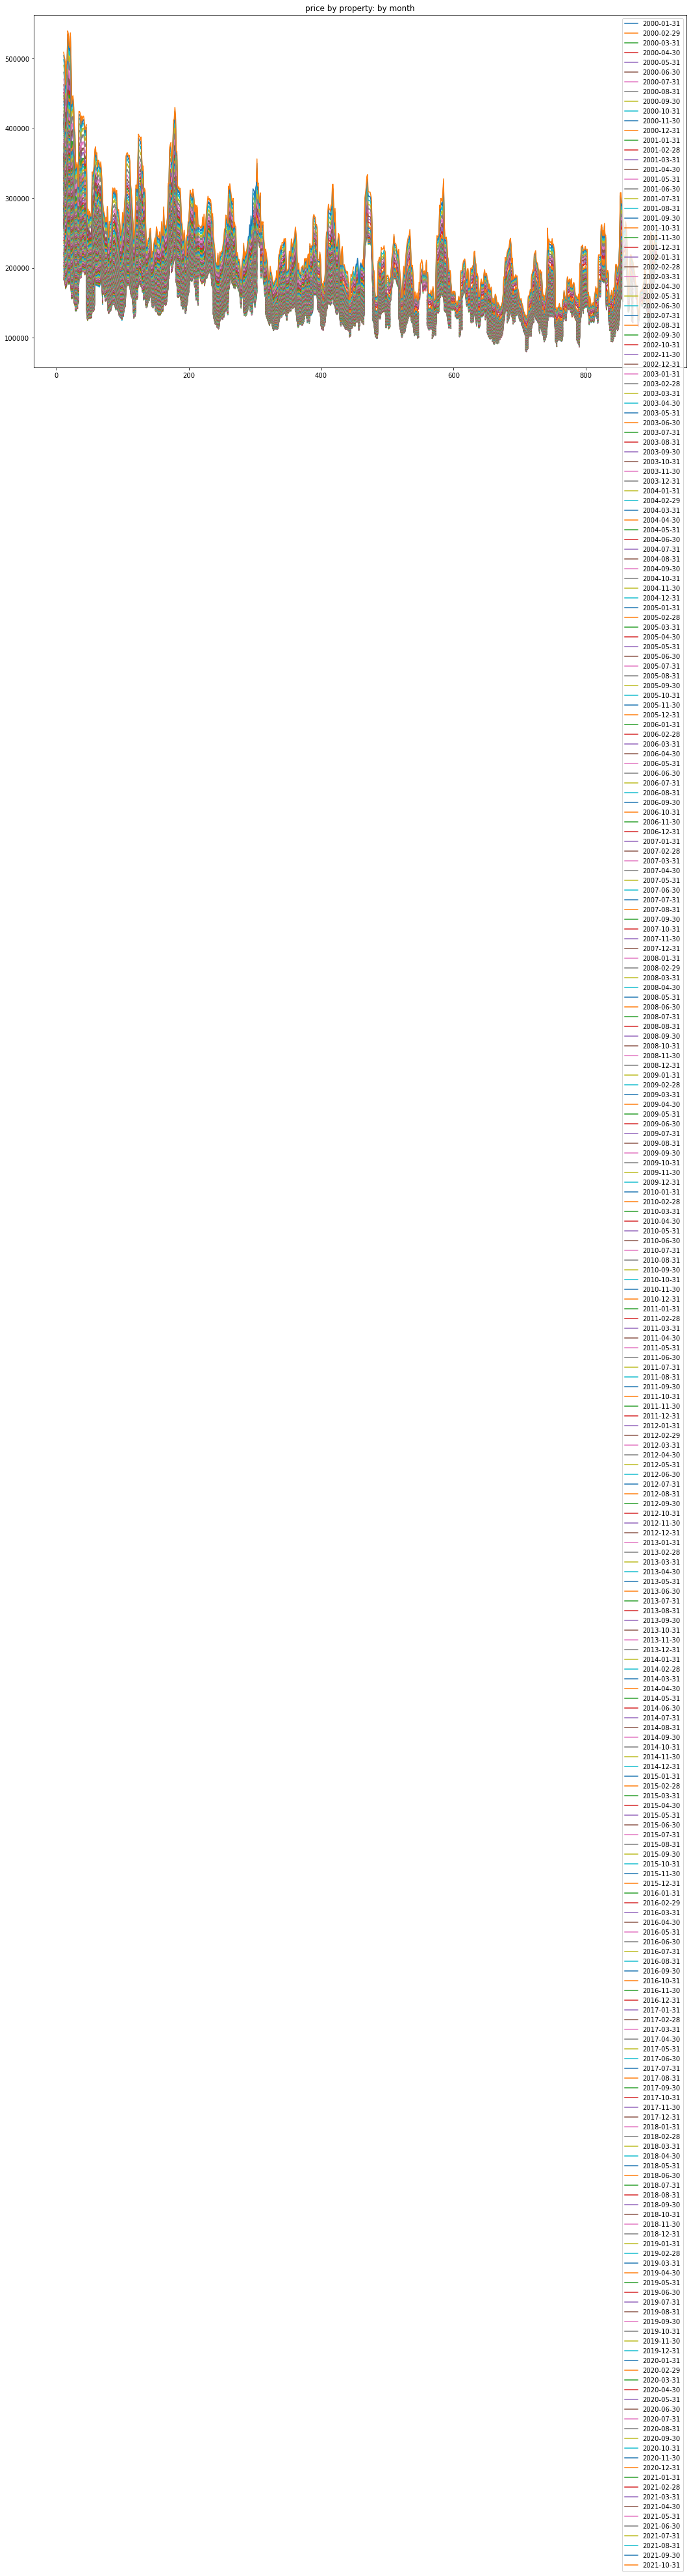

In [150]:
House_data.rolling(12).mean().plot(figsize=(18,10),
                                    title="price by property: by month")

In [151]:
missing_counts = pd.DataFrame({'variable_name':House_data.columns,
                                 'num_of_missing_values':list(House_data.isnull().sum())})


In [152]:
missing_counts.head(30)

,variable_name,num_of_missing_values
0,2000-01-31,465
1,2000-02-29,464
2,2000-03-31,463
3,2000-04-30,461
4,2000-05-31,459
5,2000-06-30,458
6,2000-07-31,457
7,2000-08-31,456
8,2000-09-30,455
9,2000-10-31,455


In [153]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

House_data_imputed = pd.DataFrame(imp_mean.fit_transform(House_data),
                                           columns=House_data.columns)

In [154]:
House_data_imputed

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,127202.00000,127546.000000,127908.000000,128645.000000,129389.000000,130130.000000,130886.000000,131692.00000,132515.000000,133343.00000,...,271623.000000,274979.0,278635.0,282495.0,287202.0,292730.0,298613.0,304008.0,308632.0,312728.0
1,224341.00000,225681.000000,226887.000000,229261.000000,231472.000000,233825.000000,236298.000000,238858.00000,241425.000000,243966.00000,...,516687.000000,521426.0,525792.0,530533.0,536044.0,543211.0,551142.0,558738.0,564641.0,569191.0
2,231193.00000,231998.000000,233231.000000,235576.000000,238089.000000,240463.000000,242893.000000,245444.00000,247874.000000,250096.00000,...,741209.000000,748698.0,756569.0,767615.0,783282.0,803090.0,823992.0,837437.0,846549.0,851308.0
3,170104.00000,170505.000000,171024.000000,172064.000000,173166.000000,174257.000000,175465.000000,176820.00000,178221.000000,179599.00000,...,258211.000000,260534.0,262648.0,265690.0,268442.0,272263.0,276430.0,280547.0,283620.0,286280.0
4,130035.00000,130139.000000,130225.000000,130437.000000,130658.000000,130843.000000,131042.000000,131408.00000,131862.000000,132391.00000,...,276637.000000,280005.0,284015.0,289524.0,295921.0,303225.0,311010.0,318887.0,326057.0,332118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,110924.31377,111241.481982,111476.076404,112298.190157,113126.351893,113654.046667,114354.485588,115032.49115,115688.909492,116365.97351,...,81702.000000,82847.0,84199.0,84499.0,84998.0,85445.0,86421.0,87549.0,88609.0,89544.0
904,94741.00000,95085.000000,95668.000000,96360.000000,97075.000000,97615.000000,98709.000000,99382.00000,99515.000000,99098.00000,...,210396.185185,214132.0,219224.0,223021.0,226345.0,229787.0,232861.0,236543.0,239833.0,242809.0
905,110924.31377,111241.481982,111476.076404,112298.190157,113126.351893,113654.046667,114354.485588,115032.49115,115688.909492,116365.97351,...,136993.000000,139388.0,141606.0,143469.0,145612.0,147618.0,150033.0,155032.0,159714.0,164353.0
906,110924.31377,111241.481982,111476.076404,112298.190157,113126.351893,113654.046667,114354.485588,115032.49115,115688.909492,116365.97351,...,210396.185185,70218.0,71261.0,71623.0,72008.0,72666.0,73363.0,73961.0,74432.0,74762.0


Text(0, 0.5, 'price of a house')

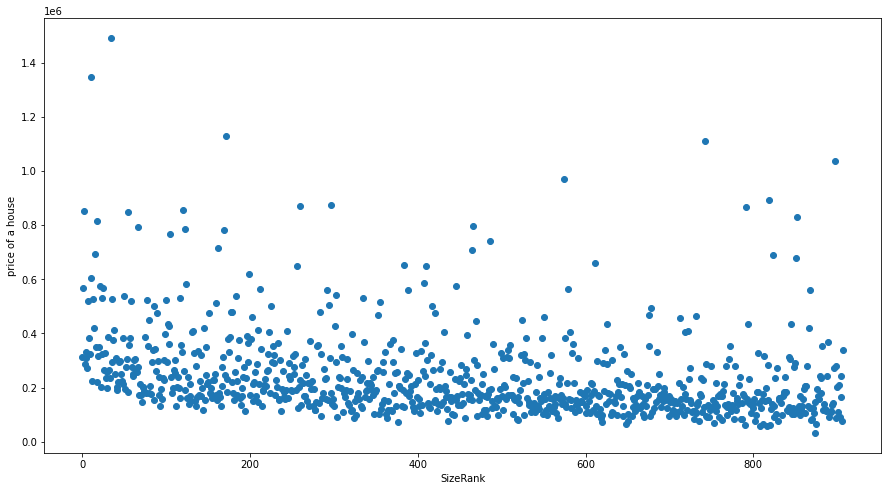

In [155]:
plt.figure(figsize=(15,8))
plt.scatter(House_data_imputed.index,House_data_imputed['2021-10-31'])
plt.xlabel('SizeRank')
plt.ylabel('price of a house')

In [156]:
House_Data_without_Price

,RegionID,SizeRank,RegionName,RegionType,StateName
0,102001,0,United States,Country,NaN
1,394913,1,"New York, NY",Msa,NY
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA
3,394463,3,"Chicago, IL",Msa,IL
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX
...,...,...,...,...,...
903,394767,929,"Lamesa, TX",Msa,TX
904,753874,930,"Craig, CO",Msa,CO
905,394968,931,"Pecos, TX",Msa,TX
906,395188,932,"Vernon, TX",Msa,TX


In [157]:
House_Data_without_Price['Avg_Price']=House_data_imputed.mean(axis=1)

In [158]:
House_Data_without_Price

,RegionID,SizeRank,RegionName,RegionType,StateName,Avg_Price
0,102001,0,United States,Country,NaN,194005.229008
1,394913,1,"New York, NY",Msa,NY,407734.969466
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,504481.561069
3,394463,3,"Chicago, IL",Msa,IL,223621.465649
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,176885.240458
...,...,...,...,...,...,...
903,394767,929,"Lamesa, TX",Msa,TX,107376.884593
904,753874,930,"Craig, CO",Msa,CO,158016.370936
905,394968,931,"Pecos, TX",Msa,TX,152329.576111
906,395188,932,"Vernon, TX",Msa,TX,98870.802557


Text(0, 0.5, 'price of house')

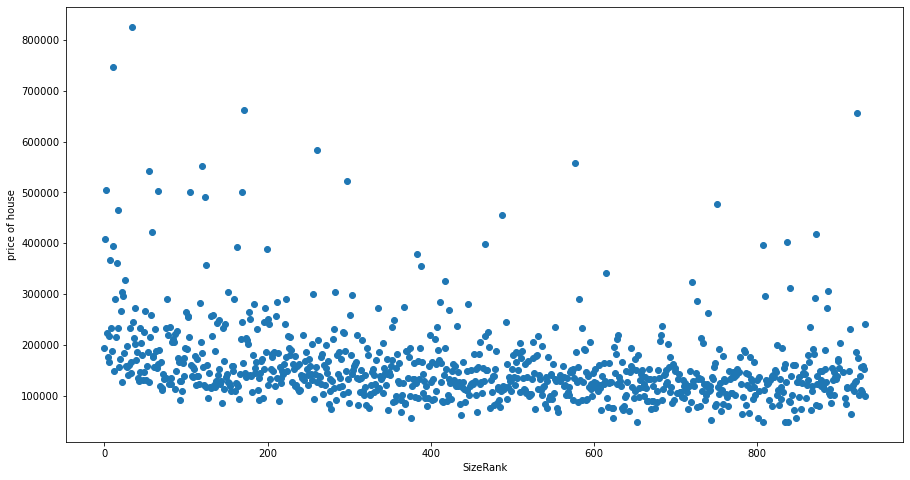

In [159]:
plt.figure(figsize=(15,8))
plt.scatter(House_Data_without_Price.SizeRank,House_Data_without_Price.Avg_Price)
plt.xlabel('SizeRank')
plt.ylabel('price of house')

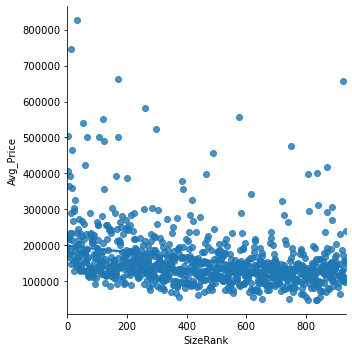

In [160]:
sns.lmplot('SizeRank','Avg_Price',data=House_Data_without_Price)

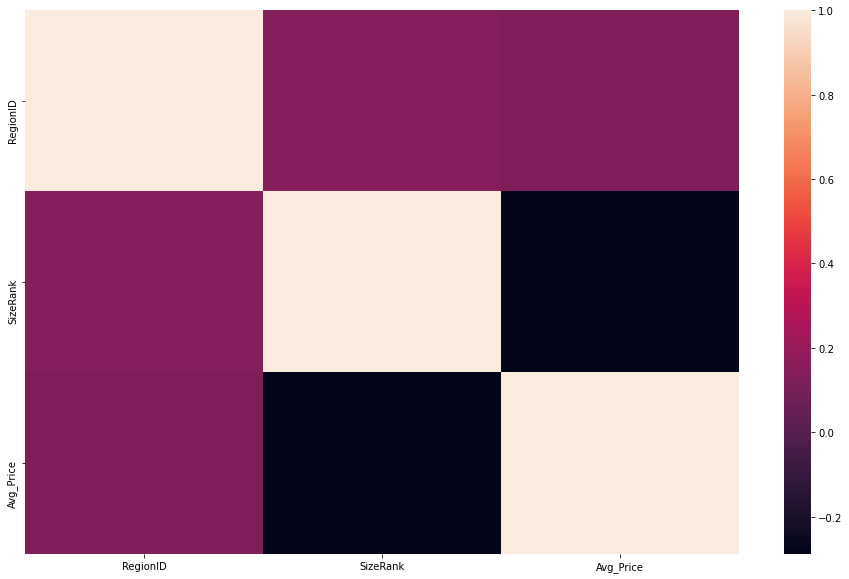

In [161]:
#corr -correlation matrix
fig = plt.figure(1, figsize=(16, 10))
sns.heatmap(House_Data_without_Price.corr())

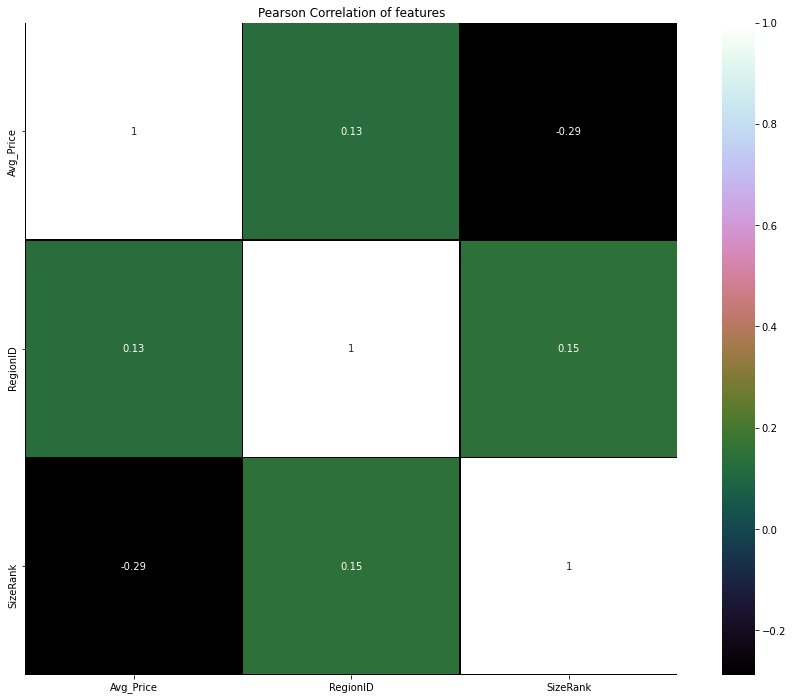

In [162]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in House_Data_without_Price.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = House_Data_without_Price.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = House_Data_without_Price[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

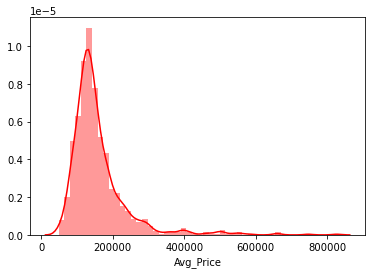

In [163]:
#distribution plot
sns.distplot(House_Data_without_Price['Avg_Price'],color='red')

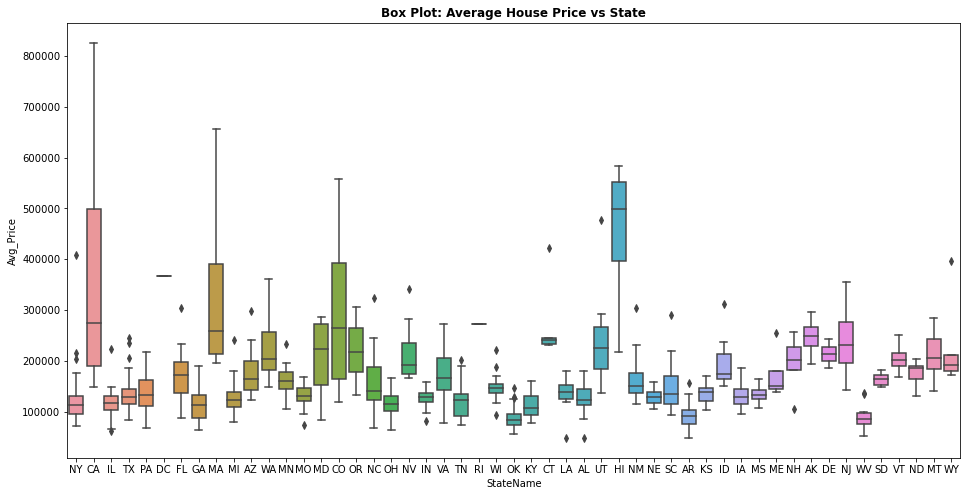

In [164]:
fig = plt.figure(1, figsize=(16, 8))
ax = fig.add_subplot(111)
ax.set_title('Box Plot: Average House Price vs State', fontsize='12',fontweight='bold')
sns.boxplot(x='StateName',y='Avg_Price',data=House_Data_without_Price)

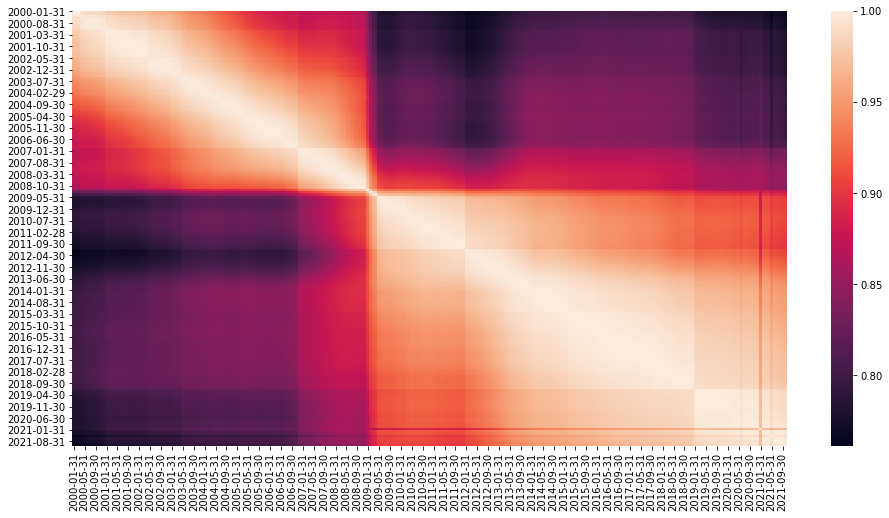

In [165]:
#corr -correlation matrix
fig = plt.figure(1, figsize=(16, 8))
ax = fig.add_subplot(111)
sns.heatmap(House_data_imputed.corr())

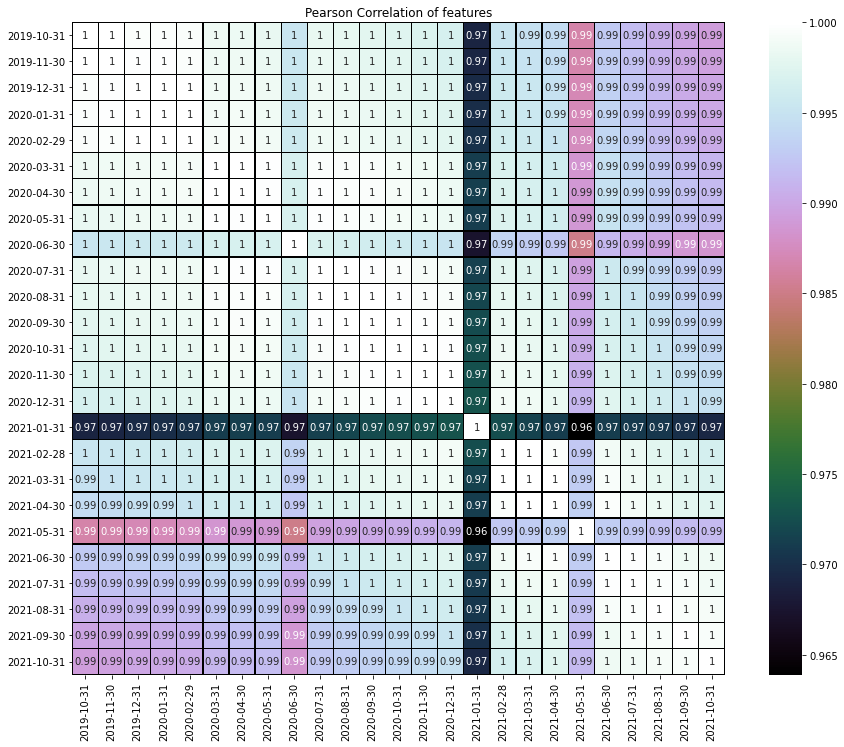

In [166]:
# Get to the numeric columns by inversion  
col=len(House_data_imputed.columns)
num_list = num_list = House_data_imputed.iloc[:,237:col].columns
# Create Dataframe containing only numerical features
house_num = House_data_imputed[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

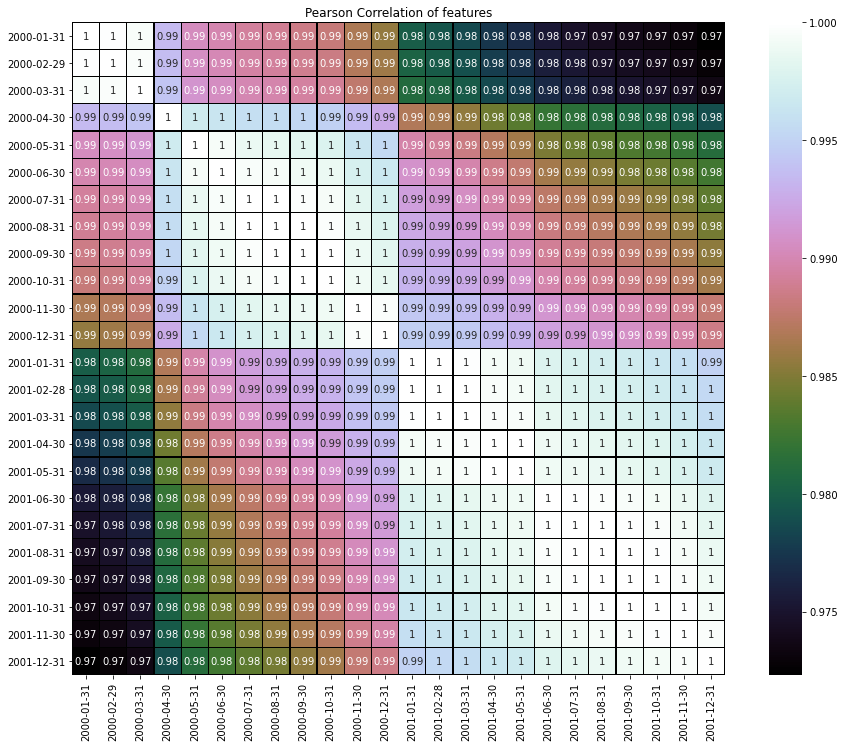

In [167]:
# Get to the numeric columns by inversion            
num_list = House_data_imputed.iloc[:,0:24].columns
# Create Dataframe containing only numerical features
house_num = House_data_imputed[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [168]:
X_data=House_data_imputed.copy()
X_data.columns = pd.to_datetime(X_data.columns)

In [169]:
start_date=X_data.iloc[:,0].name
xtrain=[]
for i in range(0, len(X_data.columns)):
    end_date=X_data.iloc[:,i].name
    num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
    xtrain.append(num_months+1)
print(xtrain)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [170]:
num_list = House_data_imputed.columns

In [171]:
ytrain = House_data_imputed[num_list]

In [172]:
ytrain

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31
0,127202.00000,127546.000000,127908.000000,128645.000000,129389.000000,130130.000000,130886.000000,131692.00000,132515.000000,133343.00000,...,271623.000000,274979.0,278635.0,282495.0,287202.0,292730.0,298613.0,304008.0,308632.0,312728.0
1,224341.00000,225681.000000,226887.000000,229261.000000,231472.000000,233825.000000,236298.000000,238858.00000,241425.000000,243966.00000,...,516687.000000,521426.0,525792.0,530533.0,536044.0,543211.0,551142.0,558738.0,564641.0,569191.0
2,231193.00000,231998.000000,233231.000000,235576.000000,238089.000000,240463.000000,242893.000000,245444.00000,247874.000000,250096.00000,...,741209.000000,748698.0,756569.0,767615.0,783282.0,803090.0,823992.0,837437.0,846549.0,851308.0
3,170104.00000,170505.000000,171024.000000,172064.000000,173166.000000,174257.000000,175465.000000,176820.00000,178221.000000,179599.00000,...,258211.000000,260534.0,262648.0,265690.0,268442.0,272263.0,276430.0,280547.0,283620.0,286280.0
4,130035.00000,130139.000000,130225.000000,130437.000000,130658.000000,130843.000000,131042.000000,131408.00000,131862.000000,132391.00000,...,276637.000000,280005.0,284015.0,289524.0,295921.0,303225.0,311010.0,318887.0,326057.0,332118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,110924.31377,111241.481982,111476.076404,112298.190157,113126.351893,113654.046667,114354.485588,115032.49115,115688.909492,116365.97351,...,81702.000000,82847.0,84199.0,84499.0,84998.0,85445.0,86421.0,87549.0,88609.0,89544.0
904,94741.00000,95085.000000,95668.000000,96360.000000,97075.000000,97615.000000,98709.000000,99382.00000,99515.000000,99098.00000,...,210396.185185,214132.0,219224.0,223021.0,226345.0,229787.0,232861.0,236543.0,239833.0,242809.0
905,110924.31377,111241.481982,111476.076404,112298.190157,113126.351893,113654.046667,114354.485588,115032.49115,115688.909492,116365.97351,...,136993.000000,139388.0,141606.0,143469.0,145612.0,147618.0,150033.0,155032.0,159714.0,164353.0
906,110924.31377,111241.481982,111476.076404,112298.190157,113126.351893,113654.046667,114354.485588,115032.49115,115688.909492,116365.97351,...,210396.185185,70218.0,71261.0,71623.0,72008.0,72666.0,73363.0,73961.0,74432.0,74762.0


In [173]:
Y_train=ytrain.T

In [174]:
Y_train.shape

(262, 908)

In [175]:
Y_train

,0,1,2,3,4,5,6,7,8,9,...,898,899,900,901,902,903,904,905,906,907
2000-01-31,127202.0,224341.0,231193.0,170104.0,130035.0,129808.0,125307.0,192179.0,126205.0,153251.0,...,110924.313770,110924.313770,110924.313770,110924.313770,110924.313770,110924.313770,94741.0,110924.313770,110924.313770,110924.313770
2000-02-29,127546.0,225681.0,231998.0,170505.0,130139.0,130243.0,125385.0,192425.0,126670.0,153761.0,...,111241.481982,111241.481982,111241.481982,111241.481982,111241.481982,111241.481982,95085.0,111241.481982,111241.481982,111241.481982
2000-03-31,127908.0,226887.0,233231.0,171024.0,130225.0,130505.0,125267.0,192802.0,127086.0,154286.0,...,111476.076404,111476.076404,111476.076404,111476.076404,111476.076404,111476.076404,95668.0,111476.076404,111476.076404,111476.076404
2000-04-30,128645.0,229261.0,235576.0,172064.0,130437.0,131154.0,125384.0,193604.0,127905.0,155348.0,...,112298.190157,112298.190157,112298.190157,112298.190157,112298.190157,112298.190157,96360.0,112298.190157,112298.190157,112298.190157
2000-05-31,129389.0,231472.0,238089.0,173166.0,130658.0,131680.0,125391.0,194717.0,128579.0,156386.0,...,113126.351893,113126.351893,113126.351893,113126.351893,113126.351893,113126.351893,97075.0,113126.351893,113126.351893,113126.351893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,292730.0,543211.0,803090.0,272263.0,303225.0,296131.0,251225.0,506659.0,349934.0,292950.0,...,267602.000000,83661.000000,193880.000000,106171.000000,204040.000000,85445.000000,229787.0,147618.000000,72666.000000,330905.000000
2021-07-31,298613.0,551142.0,823992.0,276430.0,311010.0,300660.0,256996.0,511688.0,357363.0,300292.0,...,270950.000000,84547.000000,195689.000000,107019.000000,206100.000000,86421.000000,232861.0,150033.000000,73363.000000,332472.000000
2021-08-31,304008.0,558738.0,837437.0,280547.0,318887.0,304281.0,262961.0,515280.0,364833.0,307698.0,...,274089.000000,85279.000000,197878.000000,107747.000000,208175.000000,87549.000000,236543.0,155032.000000,73961.000000,334200.000000
2021-09-30,308632.0,564641.0,846549.0,283620.0,326057.0,307143.0,267801.0,517730.0,373014.0,314735.0,...,276336.000000,85842.000000,199841.000000,108499.000000,209741.000000,88609.000000,239833.0,159714.000000,74432.000000,336433.000000


In [176]:
X_train = pd.DataFrame(xtrain, columns=['Month_number'])

In [177]:
X_train.set_index('Month_number')

""
Month_number
1
2
3
4
5
...
258
259
260


In [178]:
model=LinearRegression()

In [179]:
model.fit(X_train, Y_train)

LinearRegression()

In [180]:
r_sq = model.score(X_train, Y_train)

In [181]:
print('coefficient of determination:', r_sq)

coefficient of determination: 0.4465771473134002


In [182]:
Intercept_I=model.intercept_
Intercept_I.shape

(908,)

In [183]:
Coefficient_s=model.coef_
Coefficient_s.shape

(908, 1)

In [184]:
from datetime import datetime
def prepare_X_test(DateToPrecict):  
    end_date=datetime.fromisoformat(DateToPrecict).date()
    start_date=X_data.iloc[:,0].name
    num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month) +1
    X_test = np.array(num_months).reshape((-1, 1))
    return X_test

DateToPrecict='2021-10-31'
Growth_Prediction=model.predict(prepare_X_test(DateToPrecict))

In [185]:
T_Predict=Growth_Prediction[0].T

In [186]:
T_Predict=T_Predict+Intercept_I/2

In [187]:
for i in range(0,len(T_Predict)):
    print("Prediction:", T_Predict[i], '\tCoefficient:', Coefficient_s[i],'\tIntercept:', Intercept_I[i] )

Prediction: 316079.5729499558 	Coefficient: [387.20817666] 	Intercept: 143087.35377730982
Prediction: 655899.6815701951 	Coefficient: [684.12706366] 	Intercept: 317772.2605948934
Prediction: 850363.1981708547 	Coefficient: [1446.19083502] 	Intercept: 314307.4662630517
Prediction: 340352.73722789437 	Coefficient: [75.99287652] 	Intercept: 213628.40238659296
Prediction: 299414.90966387326 	Coefficient: [526.44091084] 	Intercept: 107658.26068263578
Prediction: 347964.0070093824 	Coefficient: [359.30026446] 	Intercept: 169218.2251469685
Prediction: 276849.3953081509 	Coefficient: [407.20563947] 	Intercept: 113441.01184522241
Prediction: 594753.9026286352 	Coefficient: [702.04674401] 	Intercept: 273878.43713257875
Prediction: 381608.7267720376 	Coefficient: [471.89545311] 	Intercept: 171981.41203825572
Prediction: 297725.79152241716 	Coefficient: [247.68816522] 	Intercept: 155220.9948231991
Prediction: 639036.5009748413 	Coefficient: [748.66472666] 	Intercept: 295257.5617267702
Prediction: 

Prediction: 295270.92483830213 	Coefficient: [343.52190207] 	Intercept: 136845.45766429763
Prediction: 199968.23996142 	Coefficient: [99.68984467] 	Intercept: 115899.66710537861
Prediction: 164273.1431628829 	Coefficient: [173.81717756] 	Intercept: 79155.36176186716
Prediction: 231441.77425354577 	Coefficient: [60.43237242] 	Intercept: 143738.9951205423
Prediction: 105488.10189610299 	Coefficient: [35.80601826] 	Intercept: 64071.28340791436
Prediction: 253795.3097529047 	Coefficient: [283.04280022] 	Intercept: 119758.73073059888
Prediction: 300604.7058558544 	Coefficient: [437.63568454] 	Intercept: 123962.7710043772
Prediction: 356056.85660876817 	Coefficient: [745.63042457] 	Intercept: 107134.45691381767
Prediction: 194717.63863847835 	Coefficient: [151.03689017] 	Intercept: 103430.64894270423
Prediction: 184228.69626776635 	Coefficient: [-113.61904688] 	Intercept: 142664.59103334395
Prediction: 158858.77441105014 	Coefficient: [28.70464655] 	Intercept: 100892.1046771014
Prediction: 2

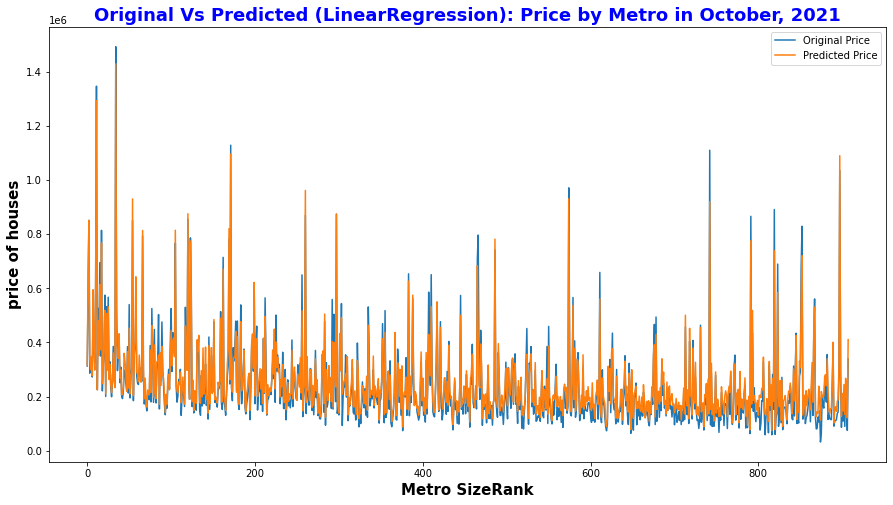

In [188]:
plt.figure(figsize=(15,8))
plt.plot(House_data_imputed.index,House_data_imputed['2021-10-31'], label='Original Price')
plt.plot(House_data_imputed.index,T_Predict, label='Predicted Price')
plt.xlabel('Metro SizeRank', fontsize='15', color='black', fontweight='bold')
plt.ylabel('price of houses',fontsize='15', color='black', fontweight='bold')
plt.title("Original Vs Predicted (LinearRegression): Price by Metro in October, 2021", fontsize='18',color='blue', fontweight='bold')
plt.legend()

In [189]:
from sklearn.ensemble import GradientBoostingRegressor

In [190]:
Estimate=[]
Grad_value=[]
Prediction_Value=[]
DateToPrecict='2021-10-31'
X_test=prepare_X_test(DateToPrecict)
for j in range(len(Y_train.columns)):
    est=GradientBoostingRegressor(n_estimators=1000, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(X_train, Y_train[j])
    Estimate.append(est)
    gradient=est.score(X_train, Y_train[j])
    Grad_value.append(gradient)
    pred = est.predict(X_test)
    Prediction_Value.append(pred)

In [191]:
for i in range(0,len(Prediction_Value)):
    print("Predicted House Price: ", Prediction_Value[i], "\tgradient: ", Grad_value[i])

Predicted House Price:  [312727.9939306] 	gradient:  0.999999999999252
Predicted House Price:  [569190.97368221] 	gradient:  0.9999999999976397
Predicted House Price:  [851307.96059721] 	gradient:  0.9999999999961783
Predicted House Price:  [286279.98255961] 	gradient:  0.9999999999881127
Predicted House Price:  [332117.99435415] 	gradient:  0.9999999999993029
Predicted House Price:  [309596.9883241] 	gradient:  0.9999999999977561
Predicted House Price:  [272065.99612199] 	gradient:  0.9999999999996763
Predicted House Price:  [520597.98641896] 	gradient:  0.9999999999990934
Predicted House Price:  [381255.97489298] 	gradient:  0.9999999999952278
Predicted House Price:  [322122.99018346] 	gradient:  0.9999999999980037
Predicted House Price:  [605223.97486692] 	gradient:  0.9999999999963615
Predicted House Price:  [1346994.952462] 	gradient:  0.9999999999993203
Predicted House Price:  [225065.98864921] 	gradient:  0.9999999999962598
Predicted House Price:  [525940.9824126] 	gradient:  0.

Predicted House Price:  [111199.99781465] 	gradient:  0.9999999999988778
Predicted House Price:  [227985.99091832] 	gradient:  0.9999999999978743
Predicted House Price:  [128753.99583119] 	gradient:  0.999999999998453
Predicted House Price:  [1110212.98565847] 	gradient:  0.999999999999859
Predicted House Price:  [94895.99770786] 	gradient:  0.9999999999998234
Predicted House Price:  [285949.99751889] 	gradient:  0.999999999999512
Predicted House Price:  [89320.99683568] 	gradient:  0.999999999999888
Predicted House Price:  [137103.9950056] 	gradient:  0.9999999999995516
Predicted House Price:  [89851.9887294] 	gradient:  0.9999999999783628
Predicted House Price:  [115109.99610384] 	gradient:  0.9999999999992719
Predicted House Price:  [279373.99280232] 	gradient:  0.9999999999989325
Predicted House Price:  [127487.99802233] 	gradient:  0.9999999999994726
Predicted House Price:  [125037.99371615] 	gradient:  0.9999999999977095
Predicted House Price:  [152421.99716149] 	gradient:  0.999

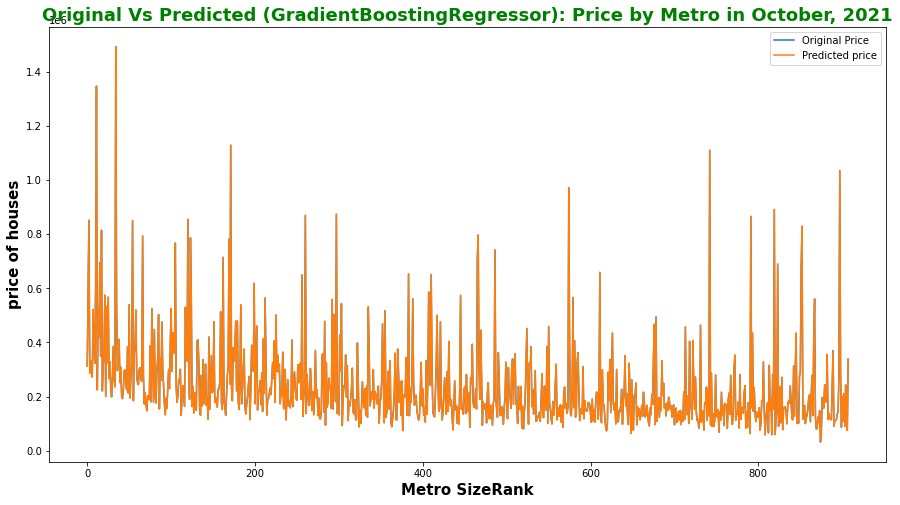

In [192]:
plt.figure(figsize=(15,8))
plt.plot(House_data_imputed.index,House_data_imputed['2021-10-31'], label='Original Price')
plt.plot(House_data_imputed.index,Prediction_Value, label='Predicted price')
plt.xlabel('Metro SizeRank', fontsize='15', color='black', fontweight='bold')
plt.ylabel('price of houses',fontsize='15', color='black', fontweight='bold')
plt.title("Original Vs Predicted (GradientBoostingRegressor): Price by Metro in October, 2021", fontsize='18',color='green', fontweight='bold')
plt.legend()

In [193]:

def FindTopBottomValues(Prediction_Value_i, Original_House_price_i):
    #reshaping predicted values
    Prediction_Value_=np.array(Prediction_Value_i).reshape(-1,1)
    #converting to dictionary
    Sorted_Predict= dict(enumerate(Prediction_Value_.flatten(), 1))
    #sorting values
    Sorted_Predict={k: v for k, v in sorted(Sorted_Predict.items(), key=lambda item: item[1])}
    els = list(Sorted_Predict.items())
    #getting top values from bottom
    Top_P=[]
    for p in range(1,6):
        Top_P.append(els[-p])
        p+=1
    Top_P=dict(Top_P)

    #getting bottom values from top
    Bottom_P=[]
    for p in range(0,5):
        Bottom_P.append(els[p])
        p+=1
    Bottom_P=dict(Bottom_P)
    
    #reshaping
    Original_House_price=np.array(Original_House_price_i).reshape(-1,1)
    #converting to dictionary
    Sorted_original= dict(enumerate(Original_House_price.flatten(), 1))
    #sorting
    Sorted_Original_Item = sorted(Sorted_original, key = lambda k: Sorted_Predict[k])
    Top_O=[]
    Bottom_O=[]
    #getting top original key
    for p in range(1,6):
        Top_O.append(Sorted_Original_Item[-p])
        p+=1
    #getting bottom original key
    for p in range(0,5):
        Bottom_O.append(Sorted_Original_Item[p])
        p+=1
    
    #getting top original values
    Top_O_V={}
    for item in Top_O:
        if item in Sorted_original.keys():
            Top_O_V[item]=Sorted_original[item]
    #getting bottom original values
    Bottom_O_V={}
    for item in Bottom_O:
        if item in Sorted_original.keys():
            Bottom_O_V[item]=Sorted_original[item]
    #getting top metro name
    Top_Metro={}
    for item in Top_O:
        if item in house.index:
            Top_Metro[item]=house.iloc[item,2]
    #getting bottom metro name
    Bottom_Metro={}
    for item in Bottom_O:
        if item in house.index:
            Bottom_Metro[item]=house.iloc[item,2]
    Top_Metro_Name1=list(Top_Metro.values())
    Bottom_Metro_Name1=list(Bottom_Metro.values())
    return Top_P, Bottom_P,Top_O_V,Bottom_O_V,Top_Metro_Name1,Bottom_Metro_Name1

In [194]:
House_data_processing=House_data_imputed['2021-10-31'].copy()
Top_Pp, Bottom_Pp, Top_O_Vv, Bottom_O_Vv, Top_Metro_Name, Bottom_Metro_Name =FindTopBottomValues(Prediction_Value, House_data_processing)
DD2=list(Top_Pp.values())
DD1=list(Top_O_Vv.values())
FormattedDD2 = [ '%.2f' % elem for elem in DD2 ]
FormattedDD1 = [ '%.2f' % elem for elem in DD1 ]


Original House Price:  ['1493020.00', '1346995.00', '1128826.00', '1110213.00', '1035468.00']
Predicted House Price: ['1493019.88', '1346994.95', '1128825.92', '1110212.99', '1035467.98']


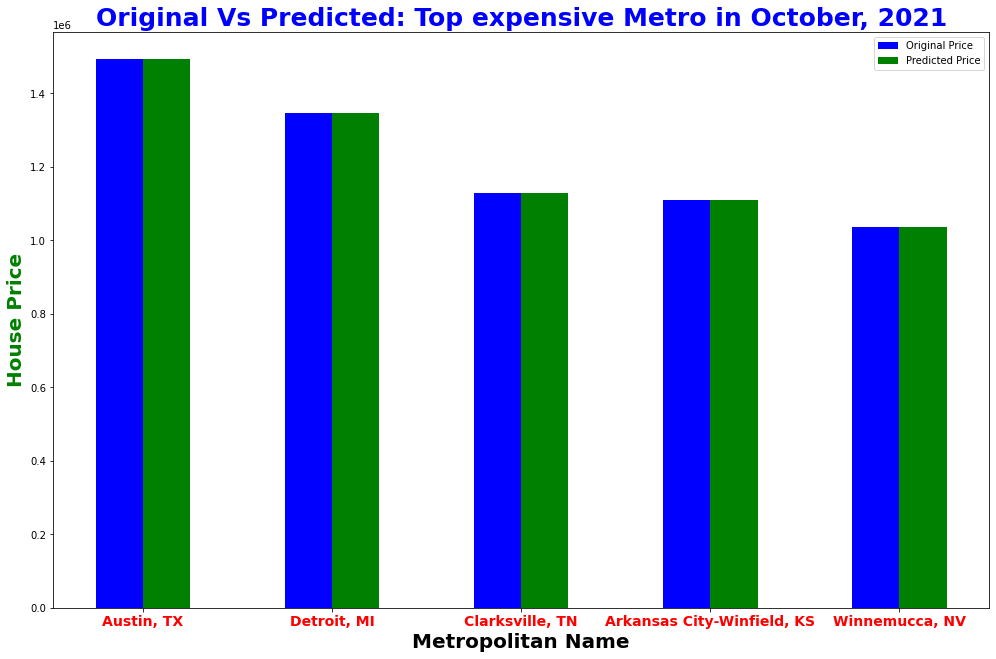

In [195]:
import numpy as np
import matplotlib.pyplot as plt

print("Original House Price: ", FormattedDD1)
output1 = np.round(DD1).astype(int)
print("Predicted House Price:", FormattedDD2)
output2 = np.round(DD2).astype(int)

data = [output1,output2]
X = np.arange(len(output2))
fig = plt.figure(figsize=(13,8))


ax = fig.add_axes([0,0,1,1])
plt.xlabel("Metropolitan Name",fontsize='20', color='black', fontweight='bold')
plt.ylabel("House Price", fontsize='20',color='green', fontweight='bold')
plt.title("Original Vs Predicted: Top expensive Metro in October, 2021", fontsize='25',color='blue', fontweight='bold')
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label='Original Price')
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, label='Predicted Price')

plt.xticks(X + 0.25/2,Top_Metro_Name, fontsize='14', color='red', fontweight='bold')
plt.legend()
plt.show()


In [196]:
BottomDD2=list(Bottom_Pp.values())
BottomDD1=list(Bottom_O_Vv.values())
BottomFormattedDD2 = [ '%.2f' % elem for elem in BottomDD2 ]
BottomFormattedDD1 = [ '%.2f' % elem for elem in BottomDD1 ]

Original House Price:  ['31775.00', '58553.00', '58558.00', '59964.00', '62957.00']
Predicted House Price: ['31775.00', '58553.00', '58558.00', '59964.00', '62956.99']


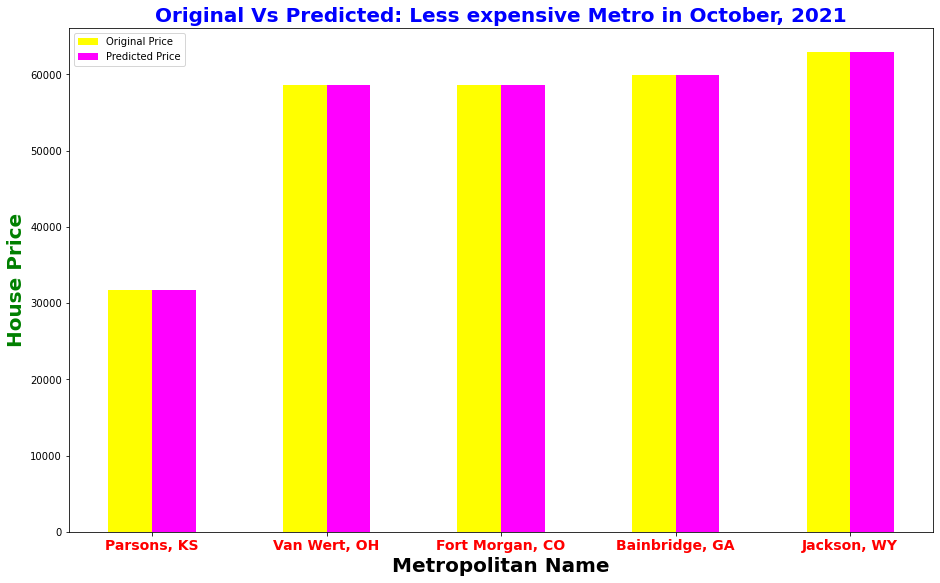

In [197]:
print("Original House Price: ", BottomFormattedDD1)
output1 = np.round(BottomDD1).astype(int)
print("Predicted House Price:", BottomFormattedDD2)
output2 = np.round(BottomDD2).astype(int)

data = [output1,output2]
X = np.arange(len(output2))
fig = plt.figure(figsize=(12,7))


ax = fig.add_axes([0,0,1,1])
plt.xlabel("Metropolitan Name",fontsize='20', color='black', fontweight='bold')
plt.ylabel("House Price", fontsize='20',color='green', fontweight='bold')
plt.title("Original Vs Predicted: Less expensive Metro in October, 2021", fontsize='20',color='blue', fontweight='bold')
ax.bar(X + 0.00, data[0], color = 'yellow', width = 0.25, label='Original Price')
ax.bar(X + 0.25, data[1], color = 'magenta', width = 0.25, label='Predicted Price')

plt.xticks(X + 0.25/2,Bottom_Metro_Name, fontsize='14', color='red', fontweight='bold')
plt.legend()
plt.show()

In [198]:
Forcasted_House_data=pd.read_csv('/home/rumana/Desktop/DM-Project/Data/zhvf_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [199]:
Forcasted_House_data.head()

,Region,RegionName,StateName,CountyName,CityName,ForecastedDate,ForecastYoYPctChange
0,Country,United States,NaN,NaN,NaN,2022-10-31,13.6
1,Msa,"Aberdeen, SD",SD,NaN,NaN,2022-10-31,8.0
2,Msa,"Aberdeen, WA",WA,NaN,NaN,2022-10-31,20.1
3,Msa,"Abilene, TX",TX,NaN,NaN,2022-10-31,11.6
4,Msa,"Ada, OK",OK,NaN,NaN,2022-10-31,12.3


In [200]:
Metro_F1=Forcasted_House_data[Forcasted_House_data['Region']=='Country']
Metro_F2=Forcasted_House_data[Forcasted_House_data['Region']=='Msa']
Metro_F=Metro_F1.append(Metro_F2)
Metro_F



,Region,RegionName,StateName,CountyName,CityName,ForecastedDate,ForecastYoYPctChange
0,Country,United States,NaN,NaN,NaN,2022-10-31,13.6
1,Msa,"Aberdeen, SD",SD,NaN,NaN,2022-10-31,8.0
2,Msa,"Aberdeen, WA",WA,NaN,NaN,2022-10-31,20.1
3,Msa,"Abilene, TX",TX,NaN,NaN,2022-10-31,11.6
4,Msa,"Ada, OK",OK,NaN,NaN,2022-10-31,12.3
...,...,...,...,...,...,...,...
894,Msa,"Youngstown, OH",OH,NaN,NaN,2022-10-31,19.7
895,Msa,"Yuba City, CA",CA,NaN,NaN,2022-10-31,13.6
896,Msa,"Yuma, AZ",AZ,NaN,NaN,2022-10-31,19.8
897,Msa,"Zanesville, OH",OH,NaN,NaN,2022-10-31,13.0


In [201]:
FromHouseD1=house['RegionName'].copy()
col=len(House_data_imputed.columns)-1
FromHouseD2=House_data_imputed['2021-10-31'].copy()
Dataset_original=pd.merge(FromHouseD1, FromHouseD2, left_index=True, right_index=True)

In [202]:
Dataset_original

,RegionName,2021-10-31
0,United States,312728.0
1,"New York, NY",569191.0
2,"Los Angeles-Long Beach-Anaheim, CA",851308.0
3,"Chicago, IL",286280.0
4,"Dallas-Fort Worth, TX",332118.0
...,...,...
903,"Lamesa, TX",89544.0
904,"Craig, CO",242809.0
905,"Pecos, TX",164353.0
906,"Vernon, TX",74762.0


In [203]:
Final_Forcast_Table=pd.merge(Dataset_original, Metro_F , on="RegionName")

In [204]:
Final_Forcast_Table

,RegionName,2021-10-31,Region,StateName,CountyName,CityName,ForecastedDate,ForecastYoYPctChange
0,United States,312728.0,Country,NaN,NaN,NaN,2022-10-31,13.6
1,"New York, NY",569191.0,Msa,NY,NaN,NaN,2022-10-31,9.7
2,"Los Angeles-Long Beach-Anaheim, CA",851308.0,Msa,CA,NaN,NaN,2022-10-31,13.4
3,"Chicago, IL",286280.0,Msa,IL,NaN,NaN,2022-10-31,10.8
4,"Dallas-Fort Worth, TX",332118.0,Msa,TX,NaN,NaN,2022-10-31,18.7
...,...,...,...,...,...,...,...,...
894,"Vermillion, SD",210920.0,Msa,SD,NaN,NaN,2022-10-31,11.5
895,"Lamesa, TX",89544.0,Msa,TX,NaN,NaN,2022-10-31,12.6
896,"Craig, CO",242809.0,Msa,CO,NaN,NaN,2022-10-31,7.5
897,"Vernon, TX",74762.0,Msa,TX,NaN,NaN,2022-10-31,6.3


In [205]:
Final_Forcast_Table['2022-10-31']= Final_Forcast_Table['2021-10-31'] + ((Final_Forcast_Table['ForecastYoYPctChange'] * Final_Forcast_Table['2021-10-31'])/100)

In [206]:
Final_Forcast_Table

,RegionName,2021-10-31,Region,StateName,CountyName,CityName,ForecastedDate,ForecastYoYPctChange,2022-10-31
0,United States,312728.0,Country,NaN,NaN,NaN,2022-10-31,13.6,355259.008
1,"New York, NY",569191.0,Msa,NY,NaN,NaN,2022-10-31,9.7,624402.527
2,"Los Angeles-Long Beach-Anaheim, CA",851308.0,Msa,CA,NaN,NaN,2022-10-31,13.4,965383.272
3,"Chicago, IL",286280.0,Msa,IL,NaN,NaN,2022-10-31,10.8,317198.240
4,"Dallas-Fort Worth, TX",332118.0,Msa,TX,NaN,NaN,2022-10-31,18.7,394224.066
...,...,...,...,...,...,...,...,...,...
894,"Vermillion, SD",210920.0,Msa,SD,NaN,NaN,2022-10-31,11.5,235175.800
895,"Lamesa, TX",89544.0,Msa,TX,NaN,NaN,2022-10-31,12.6,100826.544
896,"Craig, CO",242809.0,Msa,CO,NaN,NaN,2022-10-31,7.5,261019.675
897,"Vernon, TX",74762.0,Msa,TX,NaN,NaN,2022-10-31,6.3,79472.006


In [207]:
DateToPrecict='2022-10-31'
Growth_Prediction=model.predict(prepare_X_test(DateToPrecict))

In [251]:
T_Predict=Growth_Prediction[0].T
T_Predict=T_Predict+Intercept_I
for i in range(0,len(T_Predict)):
    print("Prediction:", T_Predict[i], '\tCoefficient:', Coefficient_s[i],'\tIntercept:', Intercept_I[i] )

Prediction: 392269.7479584882 	Coefficient: [387.20817666] 	Intercept: 143087.35377730982
Prediction: 822995.336631513 	Coefficient: [684.12706366] 	Intercept: 317772.2605948934
Prediction: 1024871.2213226681 	Coefficient: [1446.19083502] 	Intercept: 314307.4662630517
Prediction: 448078.85293942003 	Coefficient: [75.99287652] 	Intercept: 213628.40238659296
Prediction: 359561.3309352638 	Coefficient: [526.44091084] 	Intercept: 107658.26068263578
Prediction: 436884.7227564054 	Coefficient: [359.30026446] 	Intercept: 169218.2251469685
Prediction: 338456.3689043644 	Coefficient: [407.20563947] 	Intercept: 113441.01184522241
Prediction: 740117.6821230054 	Coefficient: [702.04674401] 	Intercept: 273878.43713257875
Prediction: 473262.1782284779 	Coefficient: [471.89545311] 	Intercept: 171981.41203825572
Prediction: 378308.54691665573 	Coefficient: [247.68816522] 	Intercept: 155220.9948231991
Prediction: 795649.2585581357 	Coefficient: [748.66472666] 	Intercept: 295257.5617267702
Prediction: 1

Prediction: 381542.20963495027 	Coefficient: [536.81725346] 	Intercept: 117227.14109359204
Prediction: 171824.82978677267 	Coefficient: [132.79160449] 	Intercept: 67719.96507852944
Prediction: 226594.2705689084 	Coefficient: [196.4699926] 	Intercept: 86380.74629775868
Prediction: 232948.0100985089 	Coefficient: [-232.97946309] 	Intercept: 148392.19149309292
Prediction: 184681.2678815151 	Coefficient: [168.76828069] 	Intercept: 69219.37948582962
Prediction: 154244.641534978 	Coefficient: [38.40877244] 	Intercept: 71860.31894358165
Prediction: 221774.4219902517 	Coefficient: [224.65100315] 	Intercept: 80110.02356370586
Prediction: 224262.89621343222 	Coefficient: [331.89132822] 	Intercept: 66662.33614108976
Prediction: 928002.8933115946 	Coefficient: [1515.31646344] 	Intercept: 256403.09116434152
Prediction: 240582.64574928166 	Coefficient: [324.41401329] 	Intercept: 75846.60305343513
Prediction: 228115.7936016388 	Coefficient: [147.9785082] 	Intercept: 93784.8411767757
Prediction: 22963

In [252]:
Predict_data=Dataset_original.copy()
Predict_data['PredictedPrice']=T_Predict
Predict_data=Predict_data.drop(columns=['2021-10-31'])
Predict_data

,RegionName,PredictedPrice
0,United States,3.922697e+05
1,"New York, NY",8.229953e+05
2,"Los Angeles-Long Beach-Anaheim, CA",1.024871e+06
3,"Chicago, IL",4.480789e+05
4,"Dallas-Fort Worth, TX",3.595613e+05
...,...,...
903,"Lamesa, TX",2.101528e+05
904,"Craig, CO",3.212131e+05
905,"Pecos, TX",3.056934e+05
906,"Vernon, TX",1.931121e+05


In [253]:
PredictVsOriginal=pd.merge(Predict_data, Final_Forcast_Table , on="RegionName")
PredictVsOriginal

,RegionName,PredictedPrice,2021-10-31,Region,StateName,CountyName,CityName,ForecastedDate,ForecastYoYPctChange,2022-10-31
0,United States,3.922697e+05,312728.0,Country,NaN,NaN,NaN,2022-10-31,13.6,355259.008
1,"New York, NY",8.229953e+05,569191.0,Msa,NY,NaN,NaN,2022-10-31,9.7,624402.527
2,"Los Angeles-Long Beach-Anaheim, CA",1.024871e+06,851308.0,Msa,CA,NaN,NaN,2022-10-31,13.4,965383.272
3,"Chicago, IL",4.480789e+05,286280.0,Msa,IL,NaN,NaN,2022-10-31,10.8,317198.240
4,"Dallas-Fort Worth, TX",3.595613e+05,332118.0,Msa,TX,NaN,NaN,2022-10-31,18.7,394224.066
...,...,...,...,...,...,...,...,...,...,...
894,"Vermillion, SD",3.129680e+05,210920.0,Msa,SD,NaN,NaN,2022-10-31,11.5,235175.800
895,"Lamesa, TX",2.101528e+05,89544.0,Msa,TX,NaN,NaN,2022-10-31,12.6,100826.544
896,"Craig, CO",3.212131e+05,242809.0,Msa,CO,NaN,NaN,2022-10-31,7.5,261019.675
897,"Vernon, TX",1.931121e+05,74762.0,Msa,TX,NaN,NaN,2022-10-31,6.3,79472.006


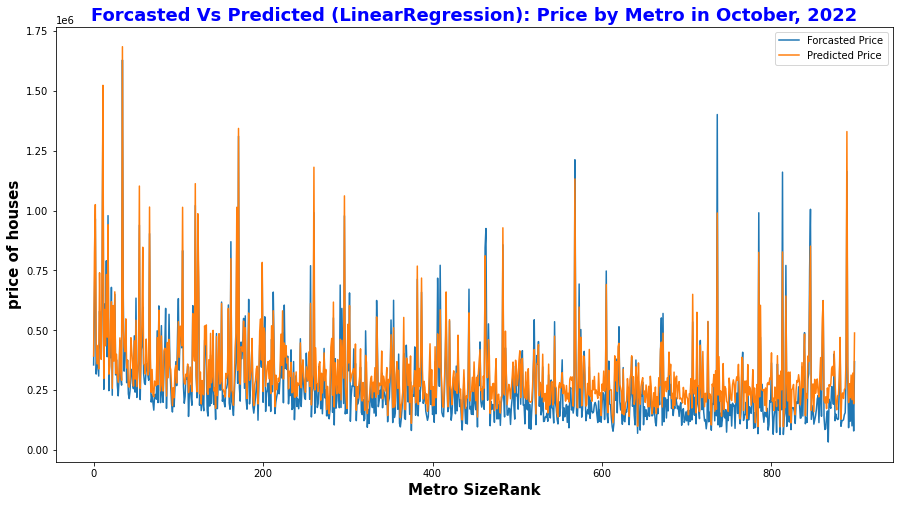

In [254]:
plt.figure(figsize=(15,8))
plt.plot(PredictVsOriginal.index,PredictVsOriginal['2022-10-31'], label='Forcasted Price')
plt.plot(PredictVsOriginal.index,PredictVsOriginal['PredictedPrice'], label='Predicted Price')
plt.xlabel('Metro SizeRank', fontsize='15', color='black', fontweight='bold')
plt.ylabel('price of houses',fontsize='15', color='black', fontweight='bold')
plt.title("Forcasted Vs Predicted (LinearRegression): Price by Metro in October, 2022", fontsize='18',color='blue', fontweight='bold')
plt.legend()

In [255]:
House_data_processing=PredictVsOriginal['2022-10-31'].copy()
Prediction_Value_f=PredictVsOriginal['PredictedPrice'].copy()
Top_Pp, Bottom_Pp, Top_O_Vv, Bottom_O_Vv, Top_Metro_Name, Bottom_Metro_Name =FindTopBottomValues(House_data_processing, Prediction_Value_f)
DD2=list(Top_Pp.values())
DD1=list(Top_O_Vv.values())
FormattedDD2 = [ '%.2f' % elem for elem in DD2 ]
FormattedDD1 = [ '%.2f' % elem for elem in DD1 ]

Original House Price:  ['1684353.95', '1522990.34', '989864.85', '1343031.14', '1132050.52']
Predicted House Price: ['1628884.82', '1464183.56', '1401088.81', '1310566.99', '1212128.74']


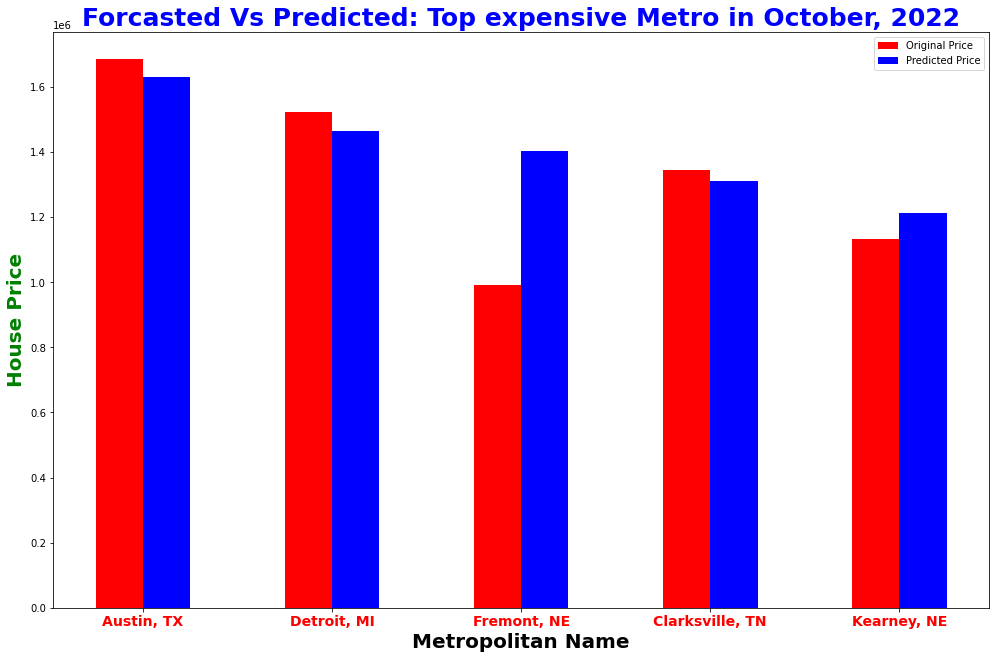

In [256]:
import numpy as np
import matplotlib.pyplot as plt

print("Original House Price: ", FormattedDD1)
output1 = np.round(DD1).astype(int)
print("Predicted House Price:", FormattedDD2)
output2 = np.round(DD2).astype(int)

data = [output1,output2]
X = np.arange(len(output2))
fig = plt.figure(figsize=(13,8))


ax = fig.add_axes([0,0,1,1])
plt.xlabel("Metropolitan Name",fontsize='20', color='black', fontweight='bold')
plt.ylabel("House Price", fontsize='20',color='green', fontweight='bold')
plt.title("Forcasted Vs Predicted: Top expensive Metro in October, 2022", fontsize='25',color='blue', fontweight='bold')
ax.bar(X + 0.00, data[0], color = 'r', width = 0.25, label='Original Price')
ax.bar(X + 0.25, data[1], color = 'b', width = 0.25, label='Predicted Price')

plt.xticks(X + 0.25/2,Top_Metro_Name, fontsize='14', color='red', fontweight='bold')
plt.legend()
plt.show()

In [257]:
print(FormattedDD1)

['1684353.95', '1522990.34', '989864.85', '1343031.14', '1132050.52']


In [258]:
#reshaping
Prediction_Value_mm=np.array(Prediction_Value_f).reshape(-1,1)
#converting to dictionary
Sorted_original= dict(enumerate(Prediction_Value_mm.flatten(), 1))
#sorting
Sorted_Original_Item={k: v for k, v in sorted(Sorted_original.items(), key=lambda item: item[1])}
els = list(Sorted_Original_Item.items())
Top_P=[]
Bottom_P=[]
#getting top original key
for p in range(1,21):
    Top_P.append(els[-p])
    p+=1
#getting bottom original key
for p in range(0,20):
    Bottom_P.append(els[p])
    p+=1
#getting top original values
Top_P_V={}
for i in range(len(Top_P)):
    item=Top_P[i][0]
    if item in Sorted_original.keys():
        Top_P_V[item]=Sorted_original[item]
#getting bottom original values
Bottom_P_V={}
for j in range(len(Bottom_P)):
    item=Bottom_P[j][0]
    if item in Sorted_original.keys():
        Bottom_P_V[item]=Sorted_original[item]
#getting top metro name
Top_Metro={}
for i in range(len(Top_P)):
    item=Top_P[i][0]
    if item in PredictVsOriginal.index:
        Top_Metro[item]=PredictVsOriginal.iloc[item,0]
#getting bottom metro name
Bottom_Metro={}
for j in range(len(Bottom_P)):
    item=Bottom_P[j][0]
    if item in PredictVsOriginal.index:
        Bottom_Metro[item]=PredictVsOriginal.iloc[item,0]
Top_Metro_NameP=list(Top_Metro.values())
Bottom_Metro_NameP=list(Bottom_Metro.values())

In [259]:
#reshaping
Original_House_pricemm=np.array(House_data_processing).reshape(-1,1)
#converting to dictionary
Sorted_original= dict(enumerate(Original_House_pricemm.flatten(), 1))
#sorting
Sorted_Original_Item={k: v for k, v in sorted(Sorted_original.items(), key=lambda item: item[1])}
els = list(Sorted_Original_Item.items())
Top_O=[]
Bottom_O=[]
#getting top original key
for p in range(1,21):
    Top_O.append(els[-p])
    p+=1
#getting bottom original key
for p in range(0,20):
    Bottom_O.append(els[p])
    p+=1
#getting top original values
Top_O_V={}
for i in range(len(Top_O)):
    item=Top_O[i][0]
    if item in Sorted_original.keys():
        Top_O_V[item]=Sorted_original[item]
#getting bottom original values
Bottom_O_V={}
for j in range(len(Bottom_O)):
    item=Bottom_O[j][0]
    if item in Sorted_original.keys():
        Bottom_O_V[item]=Sorted_original[item]
#getting top metro name
Top_Metro={}
for i in range(len(Top_O)):
    item=Top_O[i][0]
    if item in PredictVsOriginal.index:
        Top_Metro[item]=PredictVsOriginal.iloc[item,0]
#getting bottom metro name
Bottom_Metro={}
for j in range(len(Bottom_O)):
    item=Bottom_O[j][0]
    if item in PredictVsOriginal.index:
        Bottom_Metro[item]=PredictVsOriginal.iloc[item,0]
Top_Metro_NameF=list(Top_Metro.values())
Bottom_Metro_NameF=list(Bottom_Metro.values())
    

In [260]:
print(Top_Metro_NameP)
print(Top_Metro_NameF)
print(Bottom_Metro_NameP)

['Austin, TX', 'Detroit, MI', 'Clarksville, TN', 'Winnemucca, NV', 'Ottawa, IL', 'Fernley, NV', 'Huntsville, AL', 'Tulsa, OK', 'Tupelo, MS', 'Chicago, IL', 'Allentown, PA', 'Gainesville, FL', 'Lexington, KY', 'Arkansas City-Winfield, KS', 'Vallejo, CA', 'St. Louis, MO', 'Marquette, MI', 'Cordele, GA', 'Albuquerque, NM', 'Bastrop, LA']
['Austin, TX', 'Detroit, MI', 'Arkansas City-Winfield, KS', 'Clarksville, TN', 'Fernley, NV', 'Winnemucca, NV', 'Bastrop, LA', 'Huntsville, AL', 'Cordele, GA', 'Ottawa, IL', 'Hastings, NE', 'St. Louis, MO', 'Tupelo, MS', 'Chicago, IL', 'Tulsa, OK', 'Aberdeen, WA', 'Vallejo, CA', 'Allentown, PA', 'Gainesville, FL', 'Lubbock, TX']
['Fort Morgan, CO', 'Bainbridge, GA', 'Jackson, WY', 'Rock Springs, WY', 'Bay City, TX', 'Tullahoma, TN', 'Uvalde, TX', 'Dayton, TN', 'Blytheville, AR', 'Manitowoc, WI', 'Maysville, KY', 'Frankfort, IN', 'Vernal, UT', 'Danville, VA', 'Jasper, IN', 'Centralia, WA', 'Marion, NC', 'Dixon, IL', 'San Angelo, TX', 'Campbellsville, KY']


In [261]:
Compare_Metro_Name1 = pd.DataFrame(Top_Metro_NameF, columns=['Forcasted Most Expensive Metro'])
Compare_Metro_Name2 = pd.DataFrame(Top_Metro_NameP, columns=['Predicted Most Expensive Metro'])
Compare_Metro_Name3 = pd.DataFrame(Bottom_Metro_NameF, columns=['Forcasted Less Expensive Metro'])
Compare_Metro_Name4 = pd.DataFrame(Bottom_Metro_NameP, columns=['Predicted Less Expensive Metro'])
Compare_Metro_Name=pd.DataFrame()
Compare_Metro_Name['Forcasted Most Expensive Metro']=Compare_Metro_Name1['Forcasted Most Expensive Metro']
Compare_Metro_Name['Predicted Most Expensive Metro']=Compare_Metro_Name2['Predicted Most Expensive Metro']
Compare_Metro_Name['Forcasted Less Expensive Metro']=Compare_Metro_Name3['Forcasted Less Expensive Metro']
Compare_Metro_Name['Predicted Less Expensive Metro']=Compare_Metro_Name4['Predicted Less Expensive Metro']
Compare_Metro_Name

,Forcasted Most Expensive Metro,Predicted Most Expensive Metro,Forcasted Less Expensive Metro,Predicted Less Expensive Metro
0,"Austin, TX","Austin, TX","Price, UT","Fort Morgan, CO"
1,"Detroit, MI","Detroit, MI","Fort Morgan, CO","Bainbridge, GA"
2,"Arkansas City-Winfield, KS","Clarksville, TN","Bainbridge, GA","Jackson, WY"
3,"Clarksville, TN","Winnemucca, NV","Van Wert, OH","Rock Springs, WY"
4,"Fernley, NV","Ottawa, IL","Jackson, WY","Bay City, TX"
5,"Winnemucca, NV","Fernley, NV","Rock Springs, WY","Tullahoma, TN"
6,"Bastrop, LA","Huntsville, AL","Crescent City, CA","Uvalde, TX"
7,"Huntsville, AL","Tulsa, OK","Seneca Falls, NY","Dayton, TN"
8,"Cordele, GA","Tupelo, MS","Blytheville, AR","Blytheville, AR"
9,"Ottawa, IL","Chicago, IL","Ketchikan, AK","Manitowoc, WI"


In [262]:
DD2=list(Top_P_V.values())
DD1=list(Top_O_V.values())
FormattedDD2 = [ '%.2f' % elem for elem in DD2 ]
FormattedDD1 = [ '%.2f' % elem for elem in DD1 ]

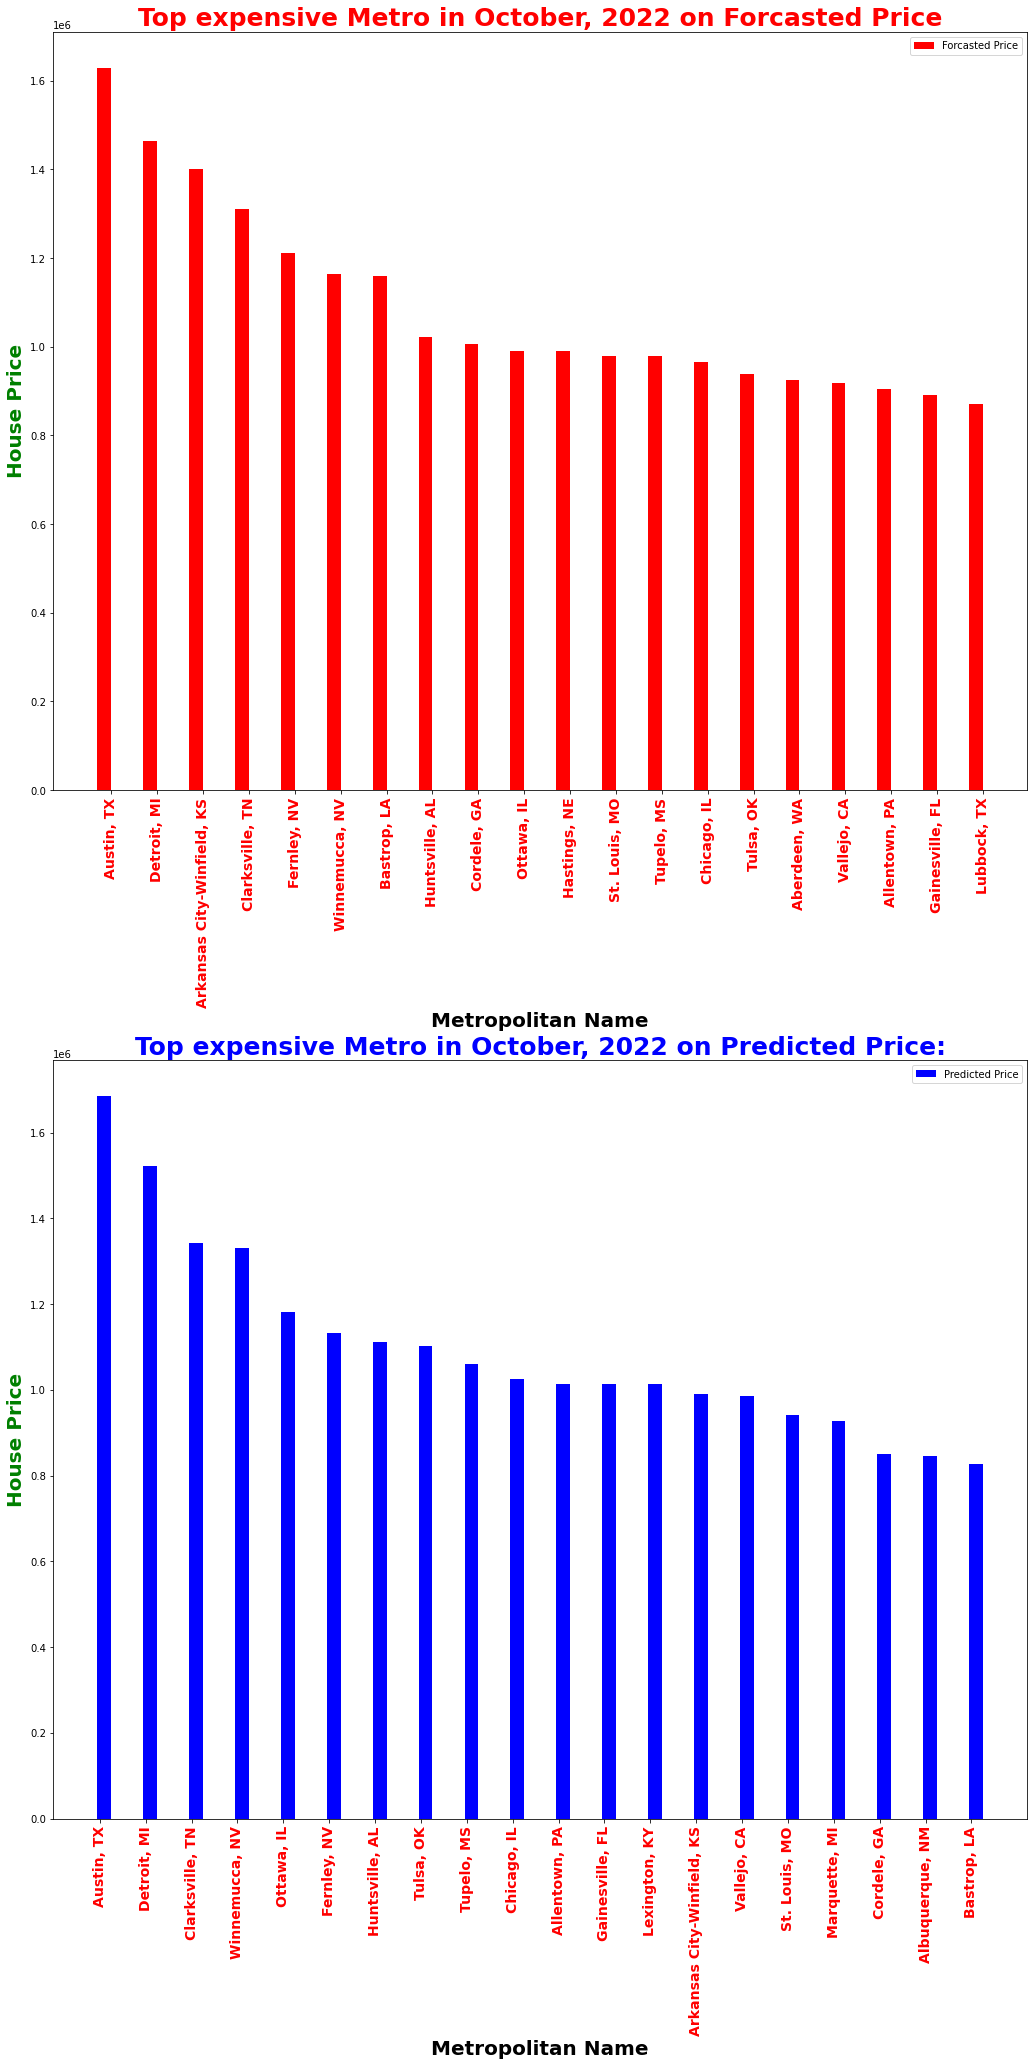

In [263]:
#print("Original House Price: ", FormattedDD1)
output1 = np.round(DD1).astype(int)
#print("Predicted House Price:", FormattedDD2)
output2 = np.round(DD2).astype(int)

data = [output1,output2]
X = np.arange(len(output2))
fig = plt.figure(figsize=(15,26))


plt.subplot(2,1,1)
#This will create the bar graph for poulation
plt.bar(X + 0.00, data[0], color = 'r', width = 0.30, label='Forcasted Price')
plt.xlabel("Metropolitan Name",fontsize='20', color='black', fontweight='bold')
plt.ylabel("House Price", fontsize='20',color='green', fontweight='bold')
plt.title("Top expensive Metro in October, 2022 on Forcasted Price", fontsize='25',color='red', fontweight='bold')
plt.xticks(X + 0.30/2,Top_Metro_NameF, fontsize='14', color='red', fontweight='bold',rotation=90)
plt.legend()
fig.tight_layout(pad=3.0)
#The below code will create the second plot.
plt.subplot(2,1,2)
#This will create the bar graph for gdp i.e gdppercapita divided by population.
plt.bar(X + 0.25, data[1], color = 'b', width = 0.30, label='Predicted Price')
plt.xlabel("Metropolitan Name",fontsize='20', color='black', fontweight='bold')
plt.ylabel("House Price", fontsize='20',color='green', fontweight='bold')
plt.title("Top expensive Metro in October, 2022 on Predicted Price:", fontsize='25',color='blue', fontweight='bold')
plt.xticks(X + 0.30/2,Top_Metro_NameP, fontsize='14', color='red', fontweight='bold',rotation=90)
plt.legend()
plt.show()

In [264]:
BottomDD2=list(Bottom_P_V.values())
BottomDD1=list(Bottom_O_V.values())
BottomFormattedDD2 = [ '%.2f' % elem for elem in BottomDD2 ]
BottomFormattedDD1 = [ '%.2f' % elem for elem in BottomDD1 ]

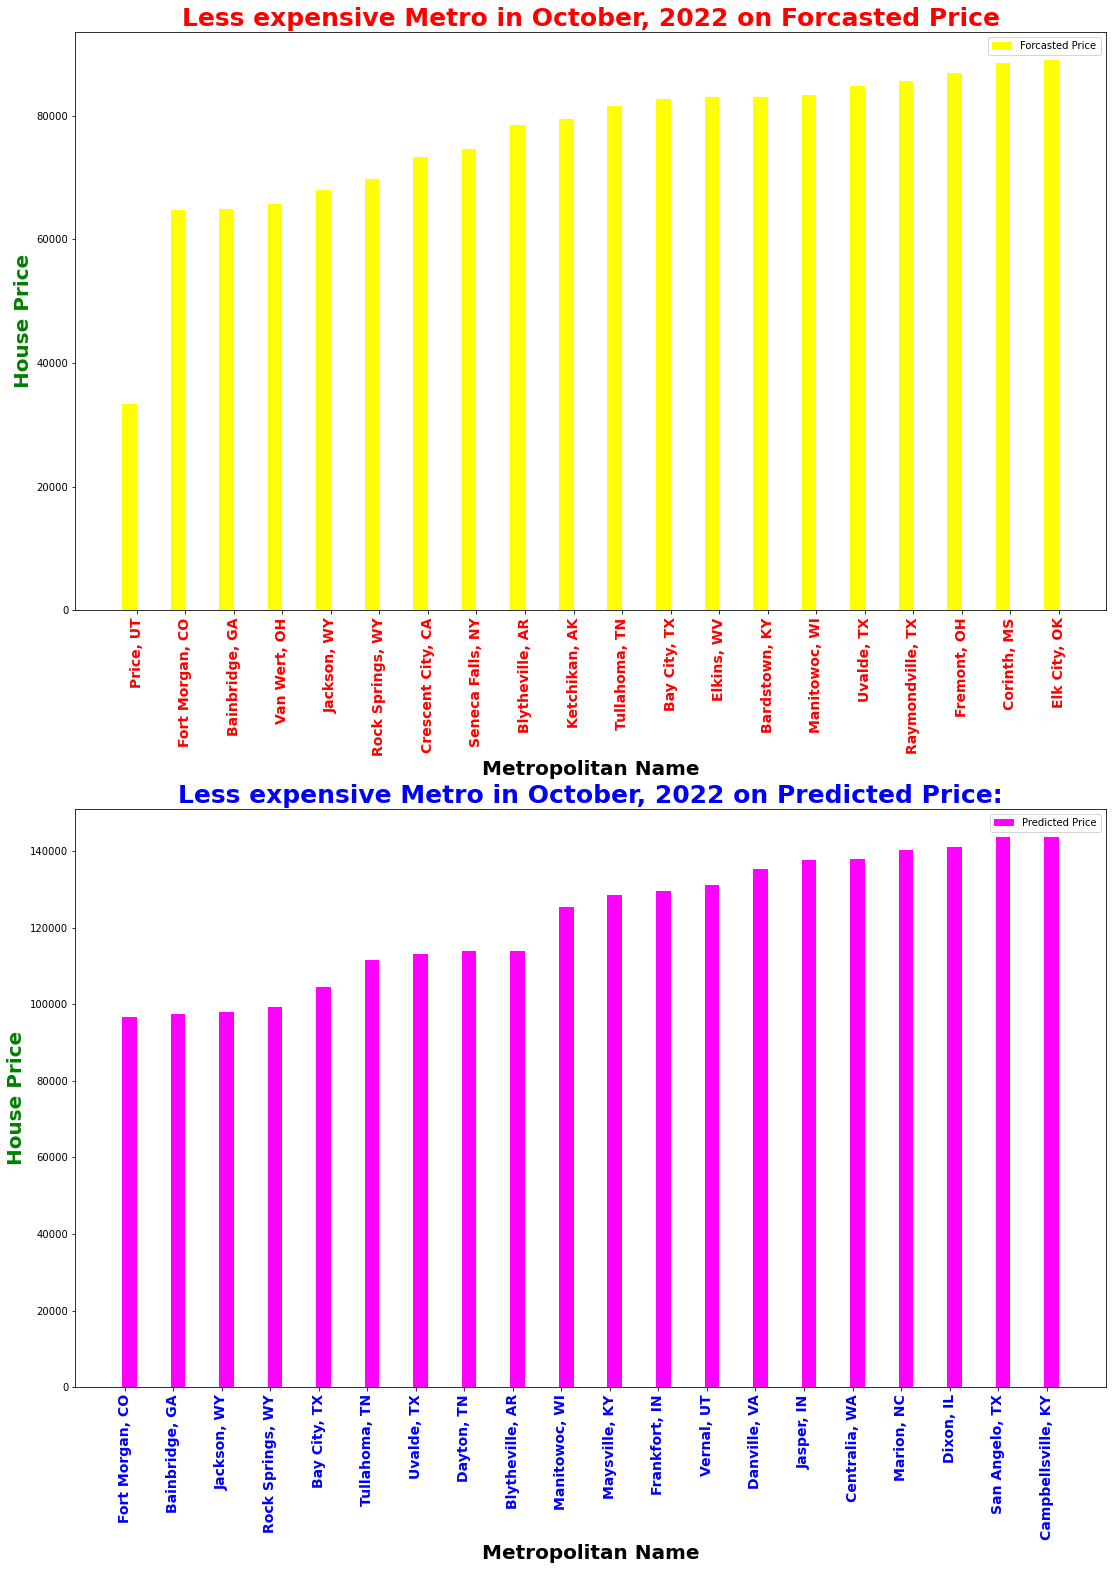

In [265]:
#print("Original House Price: ", BottomFormattedDD1)
output1 = np.round(BottomDD1).astype(int)
#print("Predicted House Price:", BottomFormattedDD2)
output2 = np.round(BottomDD2).astype(int)

data = [output1,output2]
X = np.arange(len(output2))
fig = plt.figure(figsize=(16,20))

plt.subplot(2,1,1)
#This will create the bar graph for poulation
plt.bar(X + 0.00, data[0], color = 'yellow', width = 0.30, label='Forcasted Price')
plt.xlabel("Metropolitan Name",fontsize='20', color='black', fontweight='bold')
plt.ylabel("House Price", fontsize='20',color='green', fontweight='bold')
plt.title("Less expensive Metro in October, 2022 on Forcasted Price", fontsize='25',color='red', fontweight='bold')
plt.xticks(X + 0.30/2,Bottom_Metro_NameF, fontsize='14', color='red', fontweight='bold',rotation=90)
plt.legend()
fig.tight_layout(pad=3.0)
#The below code will create the second plot.
plt.subplot(2,1,2)
#This will create the bar graph for gdp i.e gdppercapita divided by population.
plt.bar(X + 0.25, data[1], color = 'magenta', width = 0.30, label='Predicted Price')
plt.xlabel("Metropolitan Name",fontsize='20', color='black', fontweight='bold')
plt.ylabel("House Price", fontsize='20',color='green', fontweight='bold')
plt.title("Less expensive Metro in October, 2022 on Predicted Price:", fontsize='25',color='blue', fontweight='bold')
plt.xticks(X + 0.30/2,Bottom_Metro_NameP, fontsize='14', color='blue', fontweight='bold',rotation=90)
plt.legend()
plt.show()